<a href="https://colab.research.google.com/github/archisman-heartless/ML_project1/blob/main/Used_cars_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('used_cars_data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(7253, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Null value checking
df.isnull().sum()/len(df)*100

,0
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027579
Engine,0.634308
Power,0.634308


In [ ]:
df.drop('New_Price',axis=1,inplace=True)

In [ ]:
df['Price'].fillna(df['Price'].median(),inplace=True)

In [ ]:
# Null value checking
df.isnull().sum()/len(df)*100

,0
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027579
Engine,0.634308
Power,0.634308


In [ ]:
#df[['Mileage','Engine','Power']]
df['Mileage']=pd.to_numeric(df['Mileage'].str.split().str.get(0))

In [ ]:
df['Engine']=pd.to_numeric(df['Engine'].str.split().str.get(0))

In [ ]:
#df['Power']=pd.to_numeric(df['Power'].str.split().str.get(0))
df['Power']=df['Power'].str.split().str.get(0)

In [ ]:
#df['Power'].unique()
df['Power'].replace({'null':'123.7'},inplace=True)

In [ ]:
df['Power']=pd.to_numeric(df['Power'].str.split().str.get(0))

In [ ]:
df.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,float64
Engine,float64
Power,float64


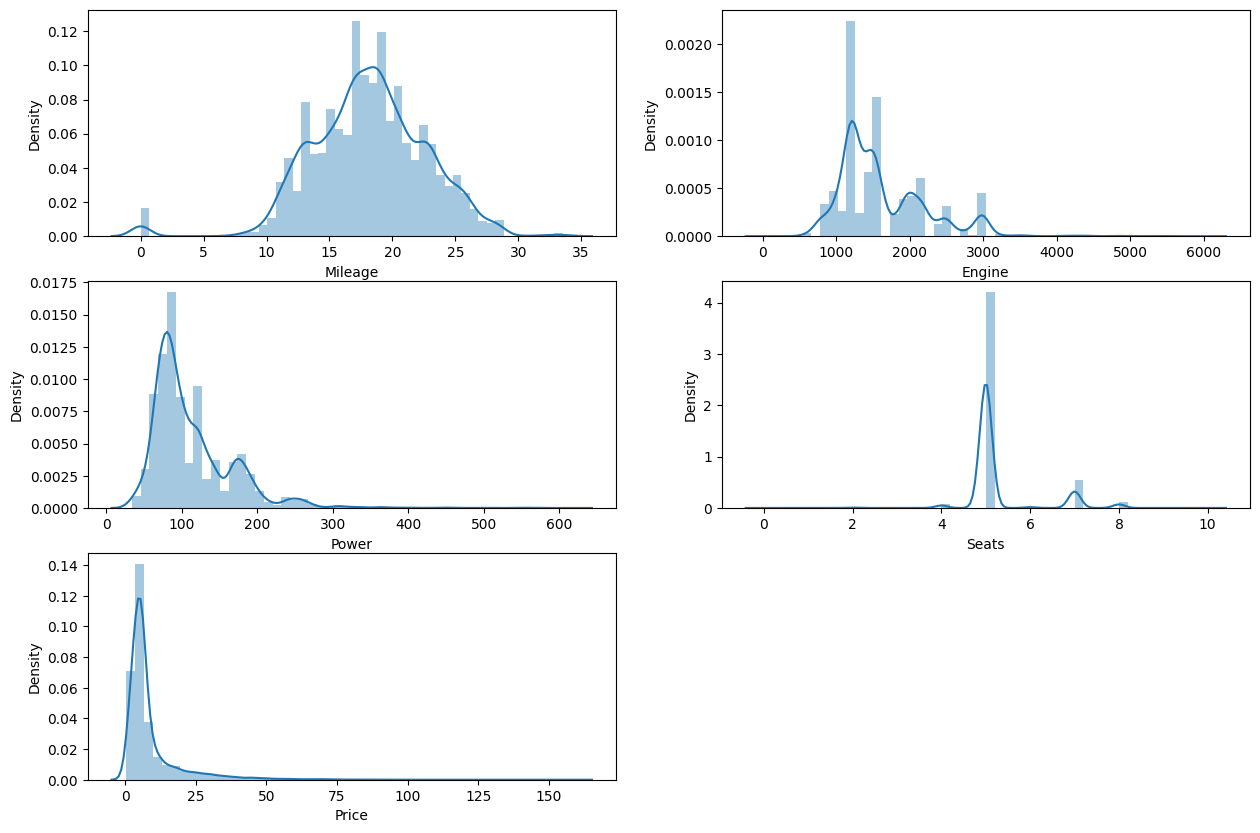

In [ ]:
#EDA
n_col=['Mileage','Engine','Power','Seats','Price']
plt.figure(figsize=(15,10))
for i,j in enumerate(n_col):
    plt.subplot(3,2,i+1)
    sns.distplot(df[j])
#     plt.title(f'Distribution of {j}')
# plt.tight_layout()
# plt.show()

<Axes: >

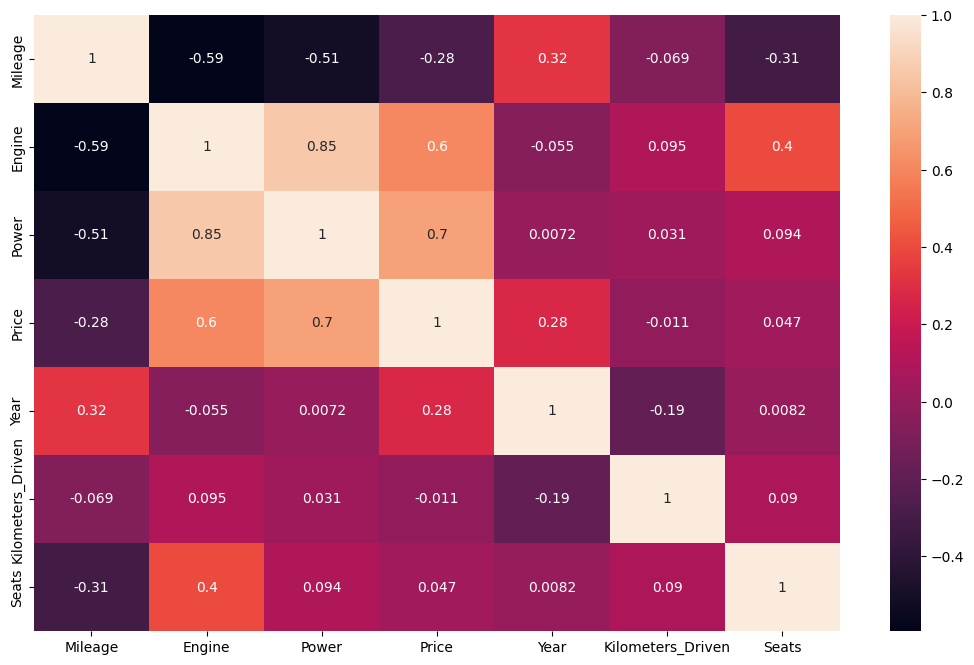

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df[['Mileage','Engine','Power','Price', 'Year', 'Kilometers_Driven', 'Seats']].corr(),annot=True)

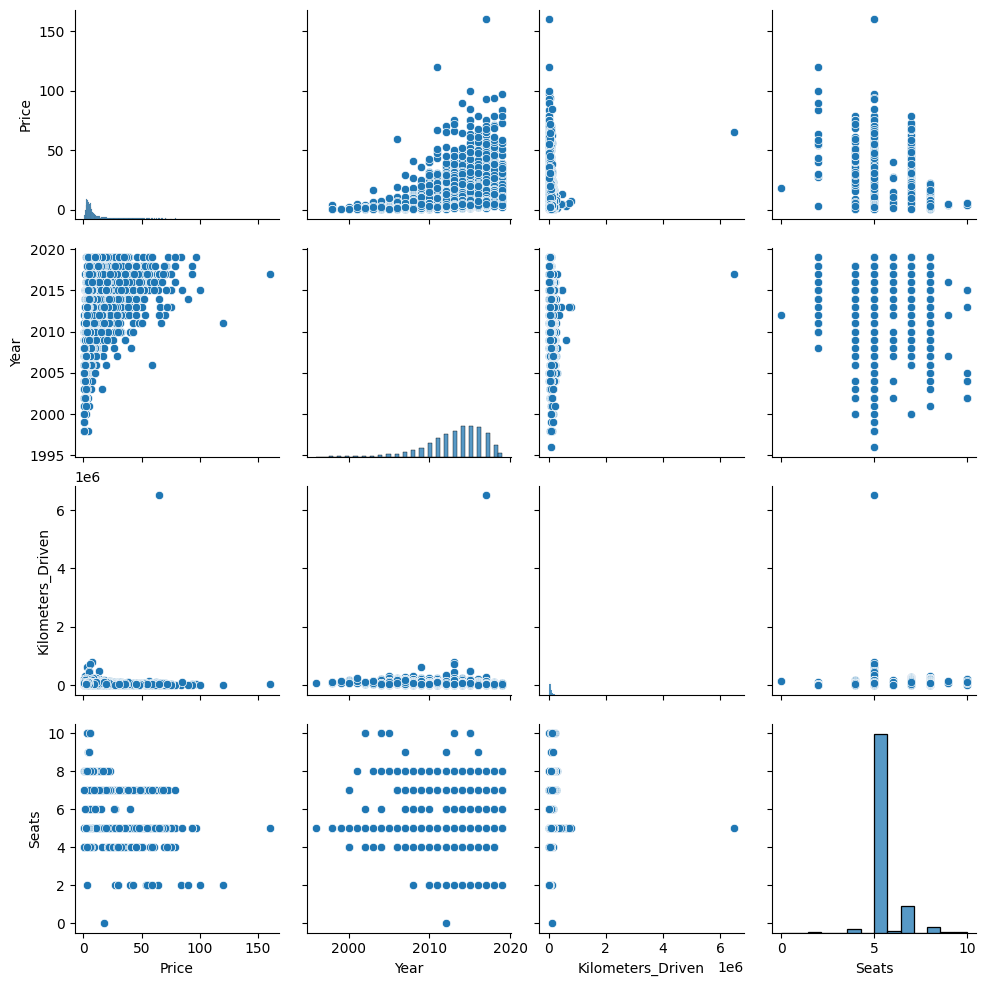

In [ ]:
sns.pairplot(df[['Mileage','Engine','Power','Price', 'Year', 'Kilometers_Driven', 'Seats']])

<Axes: xlabel='Year', ylabel='Price'>

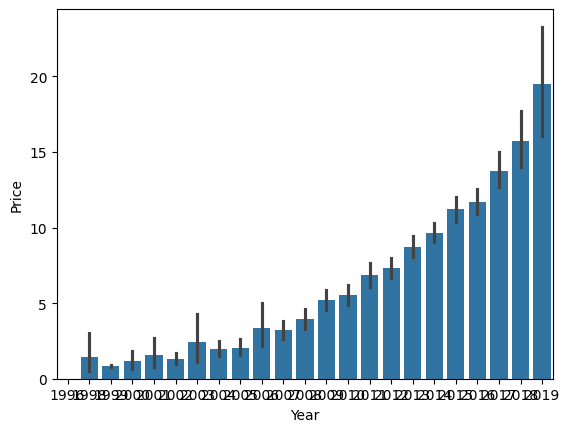

In [ ]:
sns.barplot(x='Year',y='Price',data=df)

<Axes: xlabel='Mileage', ylabel='Count'>

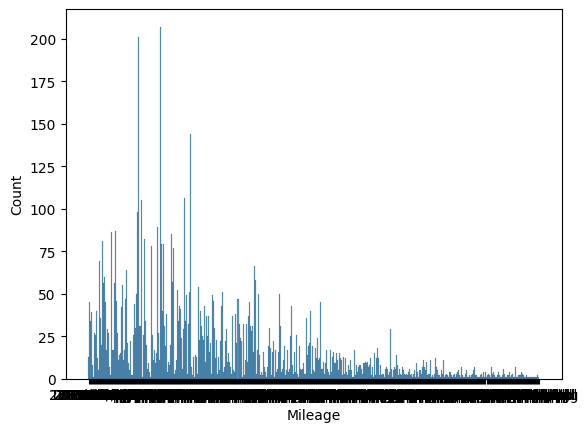

In [ ]:
sns.histplot(x='Mileage',data=df)